In [587]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Step 1 :  Import Library and Dataset

In [295]:
# Read the data in
admission = pd.read_csv(r"C:\Users\shubh\Desktop\Machine Learning\Decision Tree\admission.csv")
admission

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [297]:
admission.columns = ['Serial No.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP',
       'LOR', 'CGPA', 'Research', 'ChanceofAdmit']
admission

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


#  Step 2 : Data Pre-Processing

### Univariate Analysis

### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

### a) Visualize the 10 random rows of the data set


In [298]:
admission.sample(10)

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
387,388,307,105,2,2.0,3.5,8.10,0,0.53
166,167,302,102,3,3.5,5.0,8.33,0,0.65
1,2,324,107,4,4.0,4.5,8.87,1,0.76
73,74,314,108,4,4.5,4.0,9.04,1,0.84
65,66,325,112,4,3.5,3.5,8.92,0,0.55
63,64,315,107,2,4.0,3.0,8.50,1,0.56
177,178,319,110,3,3.5,3.5,9.04,0,0.82
113,114,320,110,2,4.0,3.5,8.56,0,0.72
328,329,324,112,4,4.0,3.5,8.77,1,0.80
236,237,325,112,4,4.0,4.5,9.17,1,0.85


### b) Generate the description for numeric variables


In [299]:
admission.describe()

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### c) Check the shape of the data set


In [300]:
admission.shape

(500, 9)

### d) Generate the correlation matrix


In [301]:
admission.isna().sum()

Serial No.          0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64

In [302]:
admission=admission.drop(['Serial No.'],axis=1)

In [303]:
admission.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Correlation Matrix

In [304]:
admission.corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceofAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

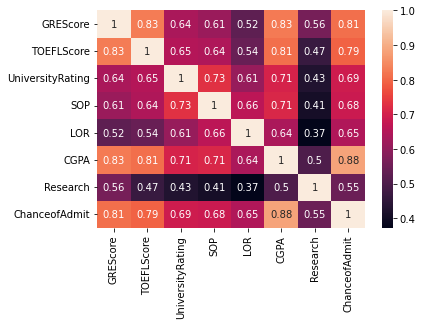

In [305]:
import seaborn as sns
sns.heatmap(admission.corr(),annot = True)

### e) Generate a correlogram

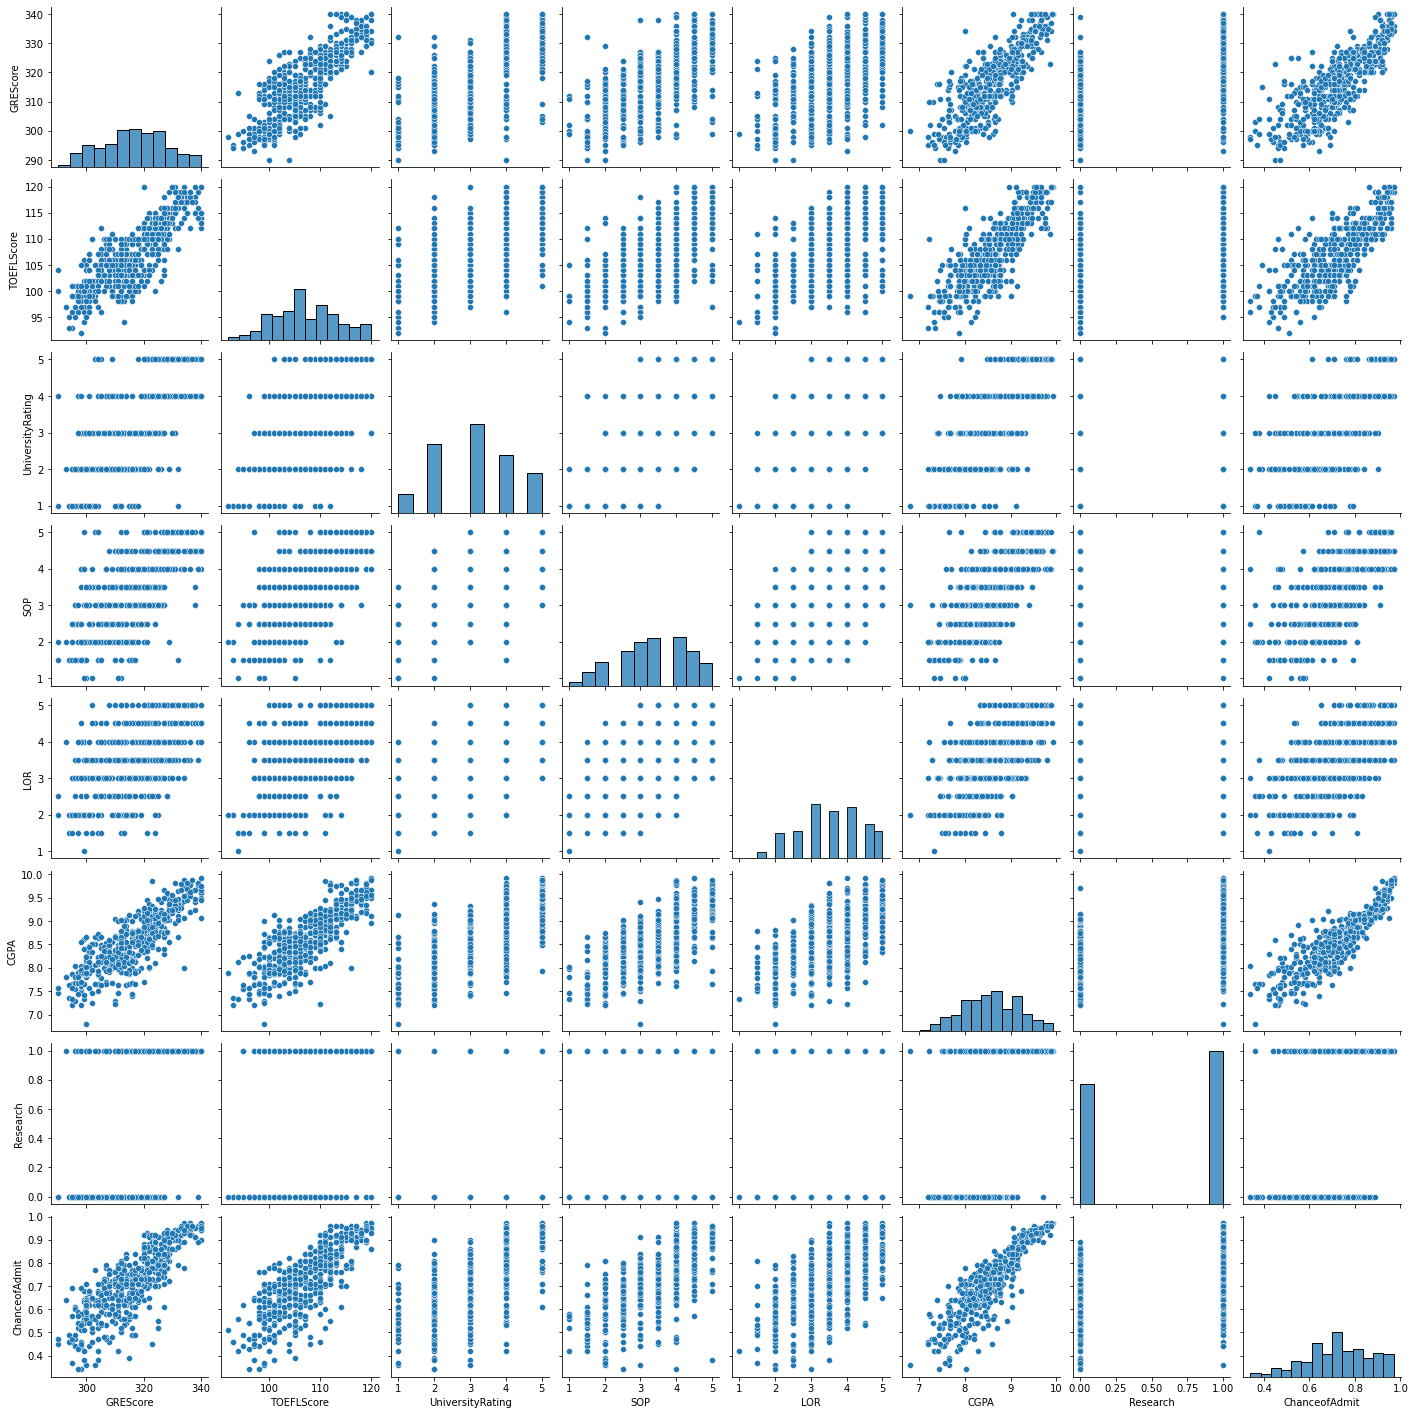

In [306]:
sns.pairplot(admission)

### Outlier identify & Treatment 

In [265]:
admission.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'ChanceofAdmit '],
      dtype='object')

In [307]:
q1 = admission['LOR'].quantile(0.25)
q3 = admission['LOR'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit

1.5

In [309]:
admission['LOR']=np.where(admission['LOR'] < lower_limit,lower_limit,admission['LOR']) 


<AxesSubplot:ylabel='LOR'>

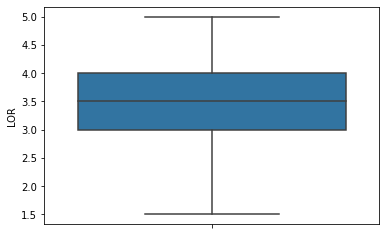

In [310]:
sns.boxplot(y='LOR',data=admission)

In [311]:
q1 = admission['ChanceofAdmit'].quantile(0.25)
q3 = admission['ChanceofAdmit'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit

0.3450000000000001

In [313]:
admission['ChanceofAdmit']=np.where(admission['ChanceofAdmit'] < lower_limit,lower_limit,admission['ChanceofAdmit']) 


<AxesSubplot:ylabel='ChanceofAdmit'>

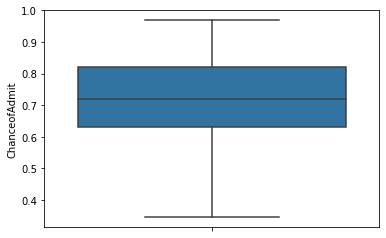

In [314]:
sns.boxplot(y='ChanceofAdmit',data=admission)

### Q.2 Find out the minimum and maximum values for GRE score


In [315]:
# Minimum and maximum values for GRE score
print("Max GREScore :", max(admission['GREScore']))
print("Min GREScore :", min(admission['GREScore']))

Max GREScore : 340
Min GREScore : 290


In [316]:
# Minimum and maximum values for TOEFL score
print("Max GREScore :", max(admission['TOEFLScore']))
print("Min GREScore :", min(admission['TOEFLScore']))

Max GREScore : 120
Min GREScore : 92


### Q.3 Find out the percentage of universities for each university rating

In [317]:
# Percentage of universities for each universtiy rating
import plotly.express as px

fig = px.pie(admission,names='UniversityRating',color='UniversityRating')
fig.show()

* Here we can see that most of universities have a rating of '3' while there are very few universities having a rating of '1' and '5'

### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [318]:
admission.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [319]:
from sklearn.model_selection import train_test_split
x = admission.iloc[:,:-1]
y = admission.iloc[:,-1]

# Splitting the data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 100)

In [320]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = admission.drop('ChanceofAdmit', axis = 1)
Y = admission[['ChanceofAdmit']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=56)

In [321]:
admission.loc[admission.ChanceofAdmit >0.80,'ChanceofAdmit']=1

In [322]:
admission.loc[admission.ChanceofAdmit<=0.80,'ChanceofAdmit']=0

### Q5) Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model

### Step 4: Model Building


In [325]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = admission.drop('ChanceofAdmit', axis = 1)
Y = admission[['ChanceofAdmit']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [326]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

### Taking subset data of Number 

# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [327]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,ChanceofAdmit,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
483,0.0,304,103,5,5.0,3.0,7.92,0
248,0.0,324,110,3,3.5,4.0,8.87,1
101,0.0,312,105,2,2.5,3.0,8.12,0
327,0.0,295,101,2,2.5,2.0,7.86,0
421,0.0,321,112,3,3.0,4.5,8.95,1


In [328]:
independent_variable = list(train.columns[1:])
independent_variable

['GREScore',
 'TOEFLScore',
 'UniversityRating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

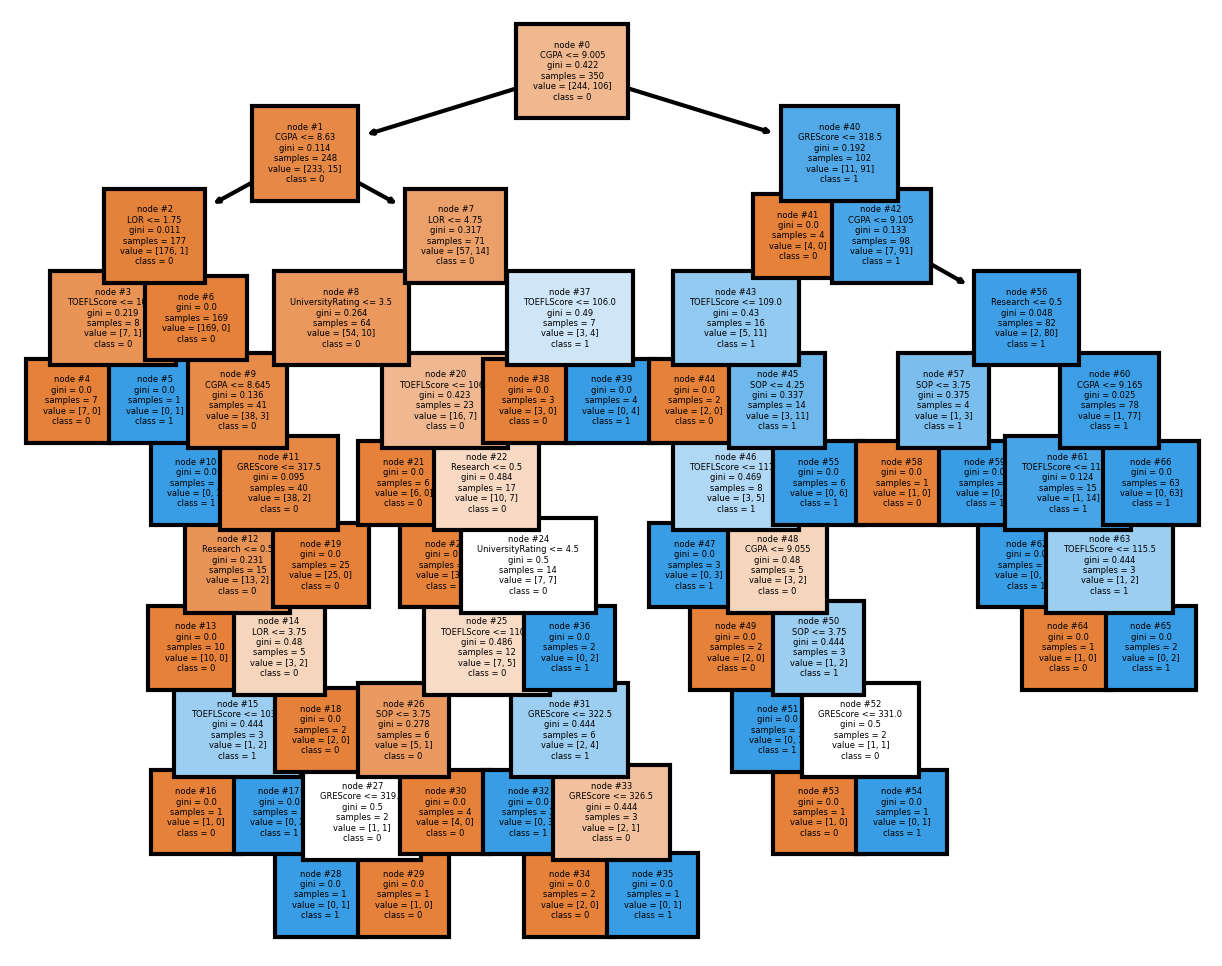

In [330]:
from sklearn import tree
import matplotlib.pyplot as plt

ChanceofAdmit=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=ChanceofAdmit, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

### Step 6 : Predictions on Train Dataset

In [331]:
train.head()

,ChanceofAdmit,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
483,0.0,304,103,5,5.0,3.0,7.92,0
248,0.0,324,110,3,3.5,4.0,8.87,1
101,0.0,312,105,2,2.5,3.0,8.12,0
327,0.0,295,101,2,2.5,2.0,7.86,0
421,0.0,321,112,3,3.0,4.5,8.95,1


In [332]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,ChanceofAdmit,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Predicted
483,0.0,304,103,5,5.0,3.0,7.92,0,0.0
248,0.0,324,110,3,3.5,4.0,8.87,1,0.0
101,0.0,312,105,2,2.5,3.0,8.12,0,0.0
327,0.0,295,101,2,2.5,2.0,7.86,0,0.0
421,0.0,321,112,3,3.0,4.5,8.95,1,0.0


### Step 7 : Model Performance Metrics

In [333]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['ChanceofAdmit'])
print(matrix)

[[244   0]
 [  0 106]]


In [335]:
Accuracy_Train=((244+106)/(350)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [336]:
from sklearn.metrics import classification_report
print(classification_report(train['ChanceofAdmit'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       244
         1.0       1.00      1.00      1.00       106

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



###  Model Improvement by Pruning Method ( Cut Tree)

In [360]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=200)

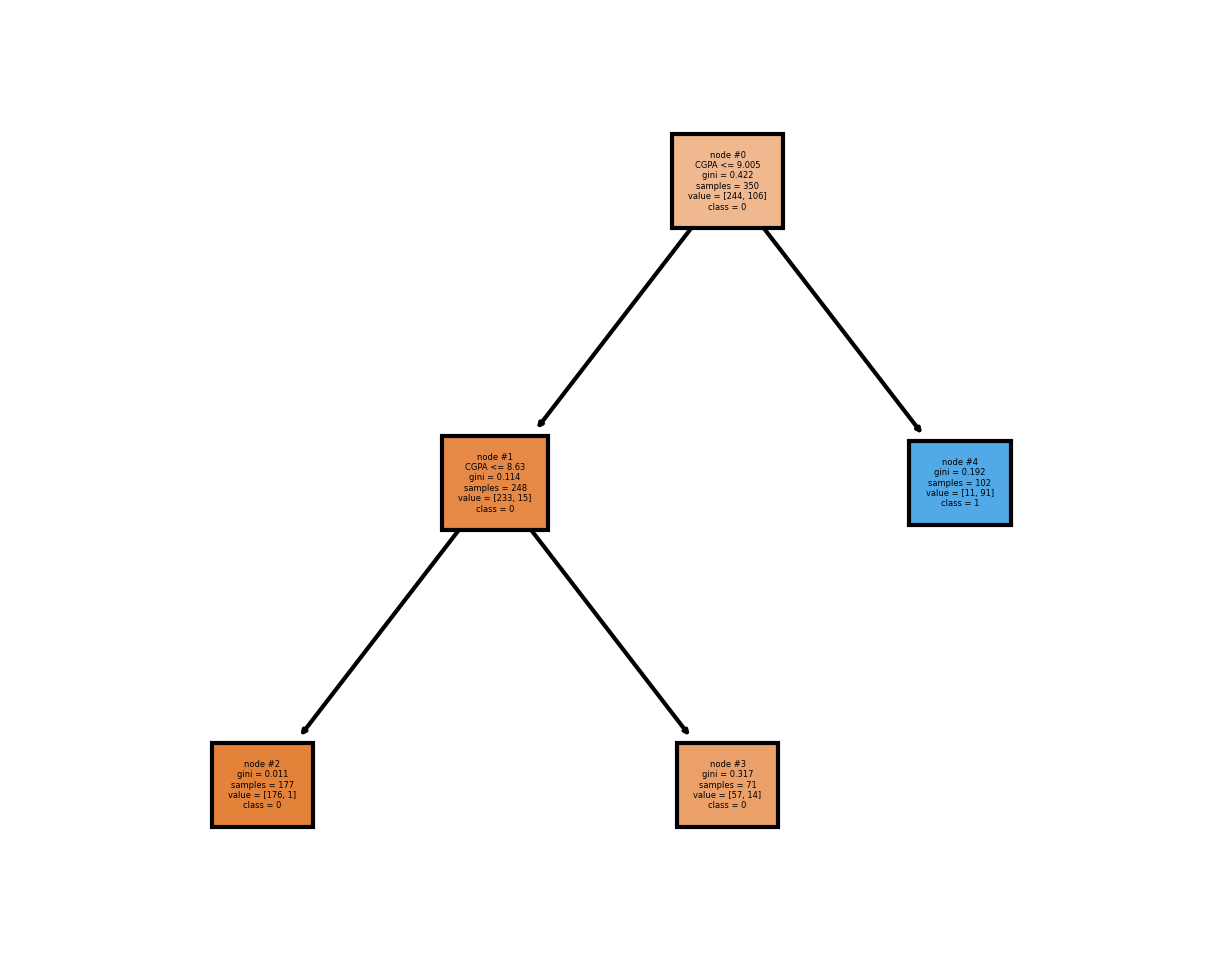

In [361]:
from sklearn import tree
import matplotlib.pyplot as plt

churn=['0', '1']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=churn, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

### Strategy & Prediction


In [362]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,ChanceofAdmit,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Predicted
483,0.0,304,103,5,5.0,3.0,7.92,0,0.0
248,0.0,324,110,3,3.5,4.0,8.87,1,0.0
101,0.0,312,105,2,2.5,3.0,8.12,0,0.0
327,0.0,295,101,2,2.5,2.0,7.86,0,0.0
421,0.0,321,112,3,3.0,4.5,8.95,1,0.0


#### Final accuracy of Model after Pruning 

In [363]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['ChanceofAdmit'])
print(matrix)

[[233  15]
 [ 11  91]]


In [364]:
Accuracy_Train=((233+91)/(350)*100)
print(Accuracy_Train)

92.57142857142857


In [365]:
from sklearn.metrics import classification_report
print(classification_report(train['ChanceofAdmit'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       244
         1.0       0.89      0.86      0.88       106

    accuracy                           0.93       350
   macro avg       0.92      0.91      0.91       350
weighted avg       0.93      0.93      0.93       350



### Step 8 : Predictions on Test Dataset

In [366]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
67,316,107,2,3.5,3.5,8.64,1,0.0
416,315,104,3,4.0,2.5,8.10,0,0.0
350,318,107,3,3.0,3.5,8.27,1,0.0
358,314,105,2,2.5,2.0,7.64,0,0.0
112,301,107,3,3.5,3.5,8.34,1,0.0


In [367]:
test['Predicted']=dt.predict(X_test)
test.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Predicted
67,316,107,2,3.5,3.5,8.64,1,0.0,0.0
416,315,104,3,4.0,2.5,8.10,0,0.0,0.0
350,318,107,3,3.0,3.5,8.27,1,0.0,0.0
358,314,105,2,2.5,2.0,7.64,0,0.0,0.0
112,301,107,3,3.5,3.5,8.34,1,0.0,0.0


### Step 9 : Model Performance Metrics on Test data 

In [368]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['ChanceofAdmit'])
print(confusion_matrix)

[[108   5]
 [  6  31]]


In [369]:
Accuracy_Train=((108+31)/(150)*100)
print(Accuracy_Train)

92.66666666666666


### Sensitivity & Specificity

### Test

In [370]:
from sklearn.metrics import classification_report
print(classification_report(train['ChanceofAdmit'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       244
         1.0       0.89      0.86      0.88       106

    accuracy                           0.93       350
   macro avg       0.92      0.91      0.91       350
weighted avg       0.93      0.93      0.93       350



* 86% is accuracy of bad customer capture by model 
* 95% is accuracy of Good customer capture by model 

### Model Improvement by Pruning Method ( Cut Tree)

In [371]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

# Grid Search Method 

In [372]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

# Q6)Build a Random Forest classifier, to predict whether a            student has a low or high chance of admission to a                 chosen university

In [419]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = admission.drop('ChanceofAdmit', axis = 1)
Y = admission[['ChanceofAdmit']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [571]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=30, # make 20 tress
                               criterion="gini",
                               max_depth=3,  # each tree will have 4 branches
                               min_samples_split=200,# each tree will have parent node
                               min_samples_leaf=100,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=100,
                       min_samples_split=200, n_estimators=30)

### Importance Features

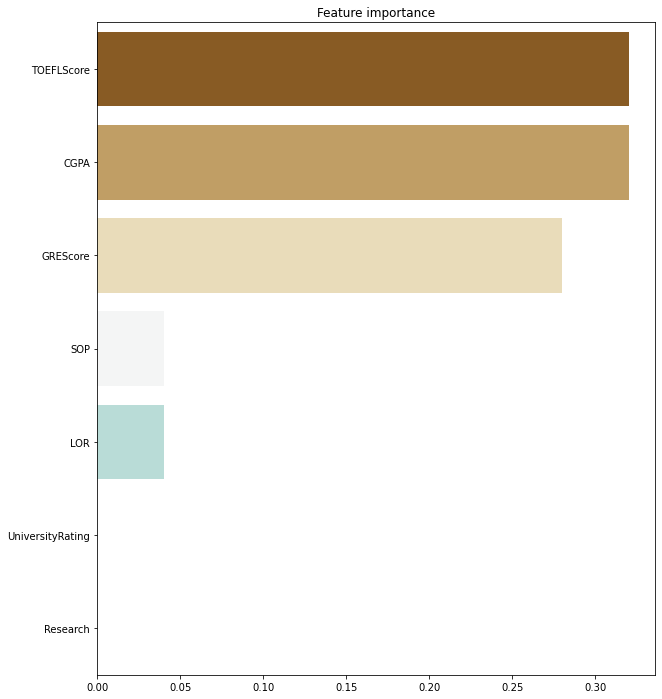

In [572]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


### Random Forest Visualization

In [573]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

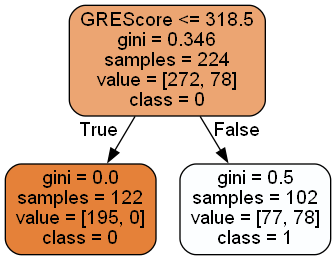

In [574]:
tree = Model.estimators_[1]  # specify the tree number   
ChanceofAdmit=['0','1'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=ChanceofAdmit,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

### Step 6 : Predictions on Train Dataset

In [575]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
483,304,103,5,5.0,3.0,7.92,0,0.0
248,324,110,3,3.5,4.0,8.87,1,0.0
101,312,105,2,2.5,3.0,8.12,0,0.0
327,295,101,2,2.5,2.0,7.86,0,0.0
421,321,112,3,3.0,4.5,8.95,1,0.0


In [576]:
train['Predicted']=Model.predict(X_train)
train.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Predicted
483,304,103,5,5.0,3.0,7.92,0,0.0,0.0
248,324,110,3,3.5,4.0,8.87,1,0.0,1.0
101,312,105,2,2.5,3.0,8.12,0,0.0,0.0
327,295,101,2,2.5,2.0,7.86,0,0.0,0.0
421,321,112,3,3.0,4.5,8.95,1,0.0,1.0


### Step 7 : Model Performance Metrics

In [577]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['ChanceofAdmit'], train['Predicted'])
print(confusion_matrix)

[[218  26]
 [  9  97]]


In [579]:
Accuracy_Train=((218+97)/(350)*100)
print(Accuracy_Train)

90.0


In [580]:
from sklearn.metrics import classification_report
print(classification_report(train['ChanceofAdmit'], train['Predicted']))

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93       244
         1.0       0.79      0.92      0.85       106

    accuracy                           0.90       350
   macro avg       0.87      0.90      0.89       350
weighted avg       0.91      0.90      0.90       350



### Step 8 : Predictions on Test Dataset

In [581]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
67,316,107,2,3.5,3.5,8.64,1,0.0
416,315,104,3,4.0,2.5,8.10,0,0.0
350,318,107,3,3.0,3.5,8.27,1,0.0
358,314,105,2,2.5,2.0,7.64,0,0.0
112,301,107,3,3.5,3.5,8.34,1,0.0


In [582]:
test['Predicted']=Model.predict(X_test)
test.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Predicted
67,316,107,2,3.5,3.5,8.64,1,0.0,0.0
416,315,104,3,4.0,2.5,8.10,0,0.0,0.0
350,318,107,3,3.0,3.5,8.27,1,0.0,0.0
358,314,105,2,2.5,2.0,7.64,0,0.0,0.0
112,301,107,3,3.5,3.5,8.34,1,0.0,0.0


### Step 9 : Model Performance Metrics on Test data 

In [583]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['ChanceofAdmit'])
print(confusion_matrix)

[[101   2]
 [ 13  34]]


In [584]:
Accuracy_test=((101+34)/(150)*100)
Accuracy_test 

90.0

# Q7)Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university.


### GBM (Gradient boosting)

In [585]:
model_parameters = {'n_estimators': [10, 50], 
        'max_depth': [3, 5],
        'learning_rate':[0.8,0.6],
        'min_samples_leaf' : [100,200,270],
        'min_samples_split' : [50,70,80]}

In [588]:
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")


gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=5,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 5],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [10, 50]},
             scoring='accuracy', verbose=1)

In [589]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 10}


In [591]:
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.6, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=10)

In [592]:
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [593]:
train_pred

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1.

### Confusion Matrix Train Data (2 Model)

In [595]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       244
         1.0       0.90      0.89      0.89       106

    accuracy                           0.93       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.93      0.93      0.93       350



## Confusion Matrix Test Data (2 Model)

In [596]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       114
         1.0       0.82      0.89      0.85        36

    accuracy                           0.93       150
   macro avg       0.89      0.91      0.90       150
weighted avg       0.93      0.93      0.93       150



# Importance Feature

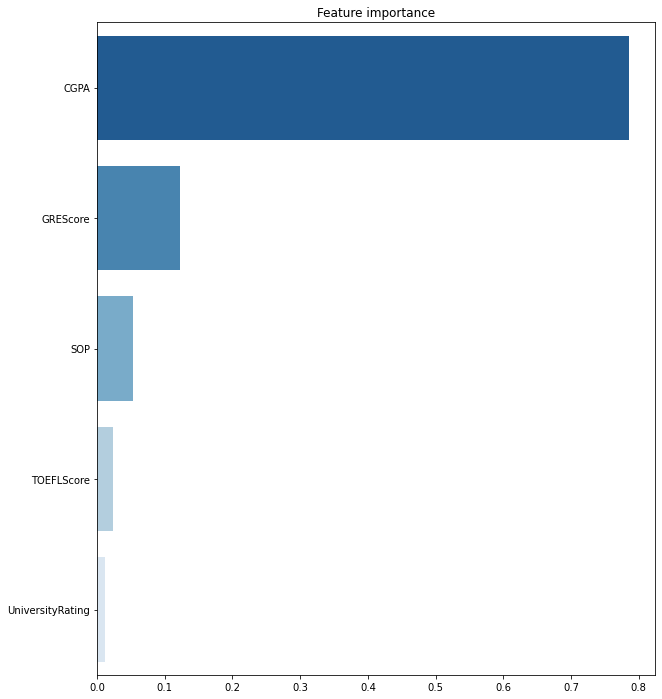

In [597]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# Gradiant Boosting Tree

In [605]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


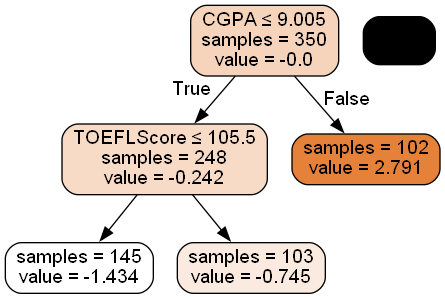

In [606]:
from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[0, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree
Chance_of_Admit=['1','0']
feature_list = list(x.columns)

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=Chance_of_Admit,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

#  Q8 Compare all of the models and justify your choice about the optimum model. 

# Decision Tree Result

The accuracy Of The Train Data is 92%

The accuracy Of The Test Data is 92%

We Can Say  our performance of Model is Good and Accuracy of The Model is also good.
So Our Model is Good Fit.

#  Random Forest Result

The accuracy Of The Train Data is 90%

The accuracy Of The Test Data is 90%

We Can Say our performance of Model is Good and Accuracy of The Model is also good. So Our Model is Good Fit.

Random Forest Result

# Ensemble Modelling Technique Result
The Accuracy Of The Train Data Is 95%

The Accuracy Of The Test Data Is 93%

We Can Say That Our Performance Of Model Is Good And Accuracy of The Model Is Also Good. 

So Our Model Is Good Fit.

 in decision Tree and Ensemble Modelling Technique Result occur overfitting.

### so,Random forest model is Best.